# Data analysis

<p>This paper presents data analysis, interpreting, and visualizing.</p>This work does not solve any of the classic DS problems


dataset link: https://archive.ics.uci.edu/ml/datasets/Turkiye+Student+Evaluation

## Import libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import statistics
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Data preprocessing

### data download

In [55]:
data = pd.read_csv("/Users/olgafrolova/Documents/Data-science(introduction)/datasets/turkiye-student-evaluation_generic.csv")
data.head(5)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### drop_duplicates

The questionnaire was filled out by students who are not always interested in the survey. Therefore, it is necessary to delete data in which the values in the columns are the same.

In [56]:
data = data.query("Q1 != Q2 or Q1 !=Q3 or Q1 !=Q4 or Q1 !=Q5 or Q1 !=Q6 or Q1 !=Q7 or Q1 !=Q8 or Q1 !=Q9 or Q1 !=Q10 or Q1 !=Q11 or Q1 !=Q12 or Q1 !=Q13 or Q1 !=Q14 or Q1 !=Q15 or Q1 !=Q16 or Q1 !=Q17 or Q1 !=Q18 or Q1 !=Q19 or Q1 !=Q20 or Q1 !=Q21 or Q1 !=Q22 or Q1 !=Q23 or Q1 !=Q24 or Q1 !=Q25 or Q1 !=Q26 or Q1 !=Q27 or Q1 !=Q28")

### search for duplicate records and delete them

Any duplicate lines from the given data  are identified and removed, as its are redundant and do not provide any additional information.

In [57]:
duplicateRows = data[data.duplicated ()]
duplicateRows

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
183,1,7,1,1,4,2,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
404,1,10,1,0,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
410,1,10,1,0,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1076,2,1,1,2,3,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1204,2,6,1,2,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
1441,2,6,1,0,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1929,2,11,1,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
2680,3,3,1,0,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2691,3,3,1,0,1,3,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3536,3,5,1,0,1,3,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [58]:
data.drop_duplicates(keep=False, inplace=True)

### distributions

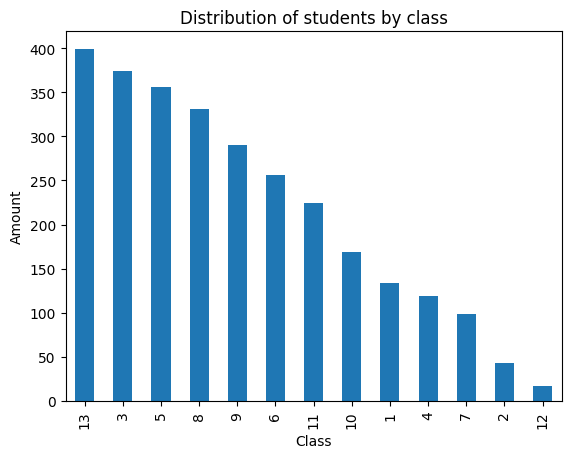

In [59]:
distributions_class = data['class'].value_counts()
distributions_class.plot.bar()
plt.title('Distribution of students by class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

<b>Note:</b>

The largest number of students in a group of 13. The smallest - in a group of 12

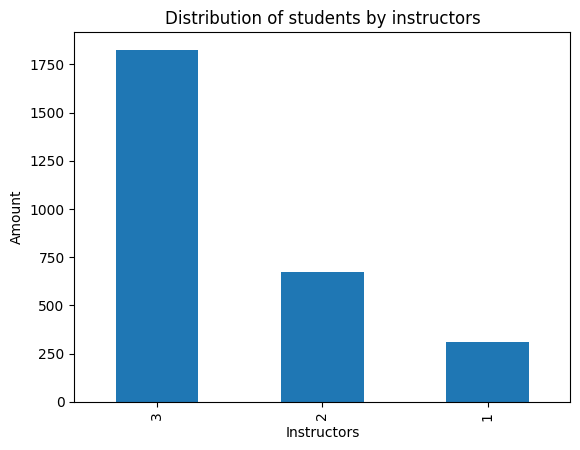

In [60]:
distributions_class = data['instr'].value_counts()
distributions_class.plot.bar()
plt.title('Distribution of students by instructors')
plt.xlabel('Instructors')
plt.ylabel('Amount')
plt.show()

<b>Note: </b>

Most students learn from a third instructor. The first instructor has the fewest number of students.

### in which groups each teacher teaches

In [61]:
classes_the_first_instr = data[data['instr'] == 1]
numbr_groups = classes_the_first_instr['class'].unique()
print(f"The first teacher teaches in groups {numbr_groups}")

The first teacher teaches in groups [ 2  7 10]


In [62]:
classes_the_second_instr = data[data['instr'] == 2]
numbr_groups = classes_the_second_instr['class'].unique()
print(f"The second teacher teaches in groups {numbr_groups}")

The second teacher teaches in groups [ 1  6 11 13]


In [63]:
classes_the_third_instr = data[data['instr'] == 3]
numbr_groups = classes_the_third_instr['class'].unique()
print(f"The third teacher teaches in groups {numbr_groups}")

The third teacher teaches in groups [ 3  4  5  8  9 12 13]


<b>Note: </b>

- The first instructor has the smallest number of students because he teaches only three groups. In addition, these groups are not numerous.
- The second instructor is responsible for four groups, in which the average number of students. However, the instructor does not teach all of the students in group 13.
- The third teacher teaches six groups completely. In addition, he teaches some of the students in group 13. Consequently, this teacher has the heaviest workload.

### on what factors the complexity of the course depends

Students had to estimate the difficulty of the course. The factors is identified that may have influenced it.

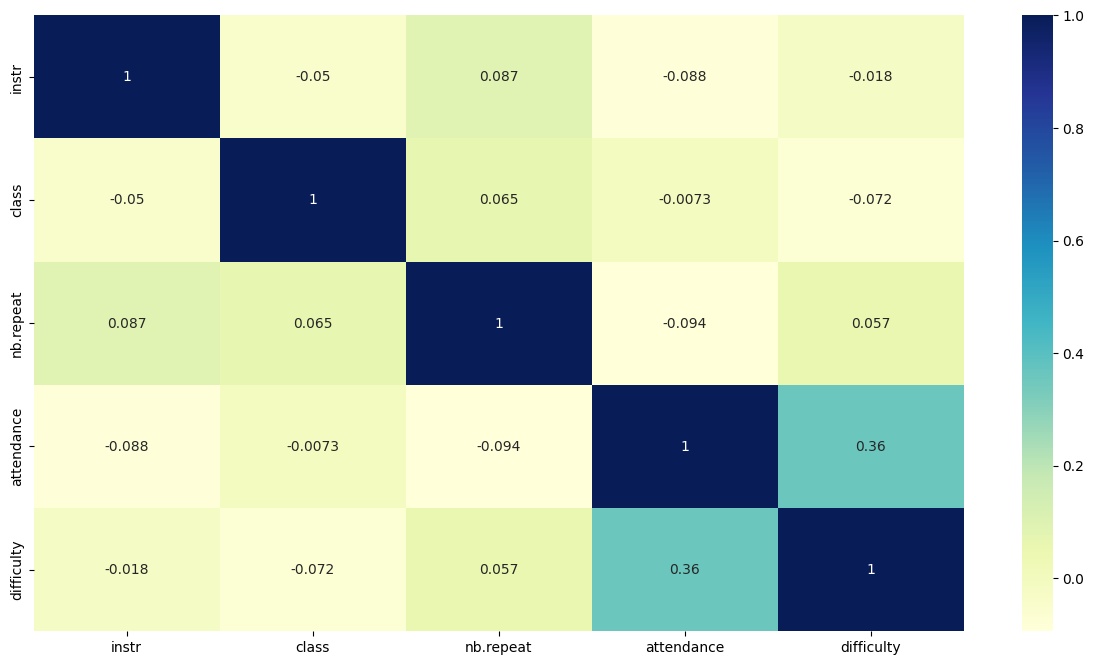

In [64]:
data_q = data[['instr', 'class', 'nb.repeat', 'attendance', 'difficulty']]
corr_matrix=data_q.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix,annot =True, cmap="YlGnBu")
plt.show()

<b>Note: </b>

Assessment of course difficulty relative to other factors is highly dependent on student attendance. However, course difficulty is not affected by which class the student was enrolled in or by the instructor.

### emission

In [65]:
columns_q = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5','Q6','Q7','Q8','Q9','Q10','Q11', 'Q12', 'Q13', 'Q14', 'Q15','Q16','Q17','Q18','Q19','Q20', 'Q21', 'Q22', 'Q23', 'Q24','Q25','Q26','Q27','Q28']

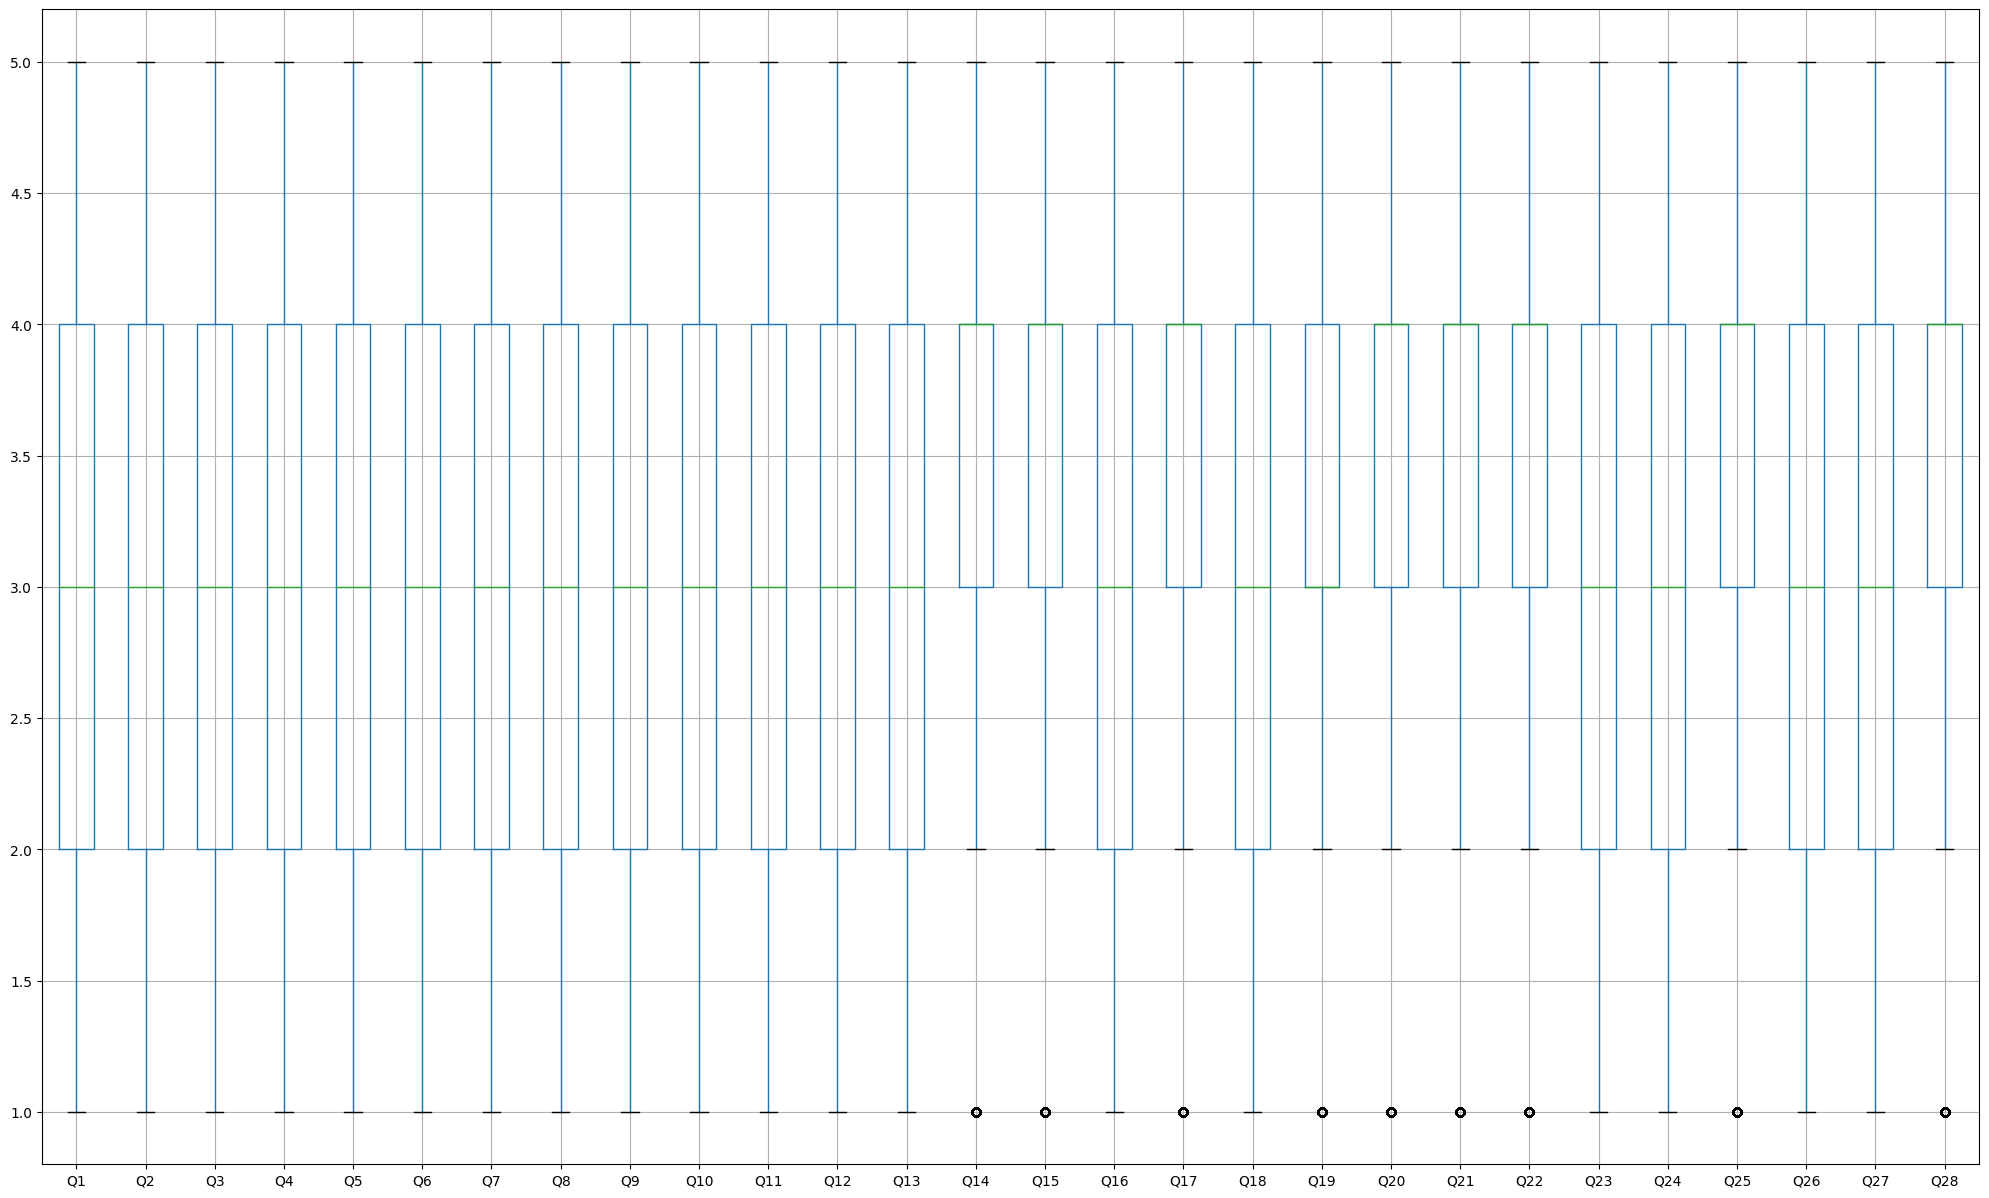

In [66]:
boxplot = data.boxplot(column=columns_q,figsize=(25,15))

In [67]:
columns_emission = ['Q14', 'Q15', 'Q17', 'Q19', 'Q20', 'Q21', 'Q22', 'Q25', 'Q28']
for column in columns_emission:
    Q = data[column]
    print(f'Percentage of emissions to the total number of responses for the column {column}: {round(Q.value_counts()[1]/ len(data[column])* 100,2)} %')

Percentage of emissions to the total number of responses for the column Q14: 8.36 %
Percentage of emissions to the total number of responses for the column Q15: 8.5 %
Percentage of emissions to the total number of responses for the column Q17: 7.01 %
Percentage of emissions to the total number of responses for the column Q19: 9.64 %
Percentage of emissions to the total number of responses for the column Q20: 9.43 %
Percentage of emissions to the total number of responses for the column Q21: 8.47 %
Percentage of emissions to the total number of responses for the column Q22: 8.25 %
Percentage of emissions to the total number of responses for the column Q25: 7.76 %
Percentage of emissions to the total number of responses for the column Q28: 9.25 %


Emissions Removal

In [68]:
for column in columns_emission:
    data = data[data[column] > 1]

<b>Note:</b>

Outliers are identified with the boxplot tool and calculated their percentage of all responses.

### General information on each of the signs (answers to questions)

In [69]:
def get_statistic_q(column):
    print("Median:", column.median())
    print("Average:", column.mean())
    print('Minimum value:', column.min())
    print("Maximum value:",column.max())
    print("Mode:", statistics.mode(column))
    print("Quartile 1st:", column.quantile(0.25))
    print("Quartile 3rd:", column.quantile(0.75))
    print("Standard deviation:",column.std())
    info = column.value_counts()
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','darkblue']
    info.plot.pie(colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.show()


<i>1. The semester course content, teaching method and evaluation system were provided at the start (Q1).</i>

Median: 3.0
Average: 2.799913569576491
Minimum value: 1
Maximum value: 5
Mode: 2
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.2406781653045016


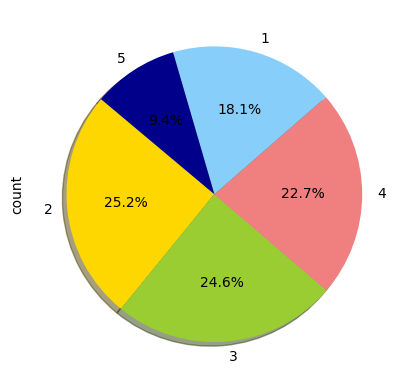

In [70]:
get_statistic_q(data['Q1'])

#### <b>Note:</b>
Students were almost equally distributed between grades 2,3,4. Hence, the level of quality of information provided before the start of the course definitely did not satisfy the students. Thus, the teacher did not give information at all or only some small part of it.

<i>2. The course aims and objectives were clearly stated at the beginning of the period (Q2).</i>

Median: 3.0
Average: 3.1421780466724285
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.1209253293061687


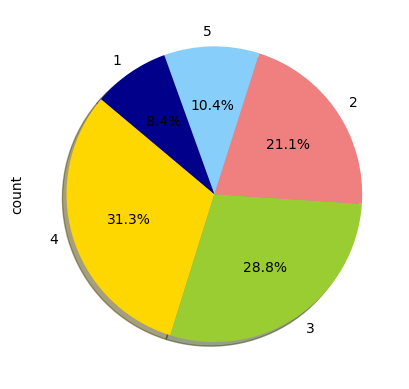

In [71]:
get_statistic_q(data['Q2'])

#### <b>Note: </b>
More than half of the students rated this item 3 or 4 points. Consequently, the instructors clearly defined the aims and objectives of the course at the beginning.

<i> 3. The course was worth the amount of credit assigned to it (Q3).</i>

Median: 3.0
Average: 3.3327571305099397
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.0532261617619763


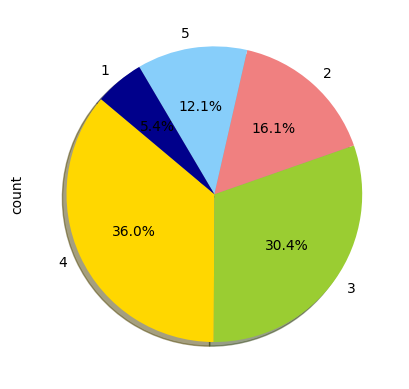

In [72]:
get_statistic_q(data['Q3'])

#### <b>Note: </b>
Most students thought that this amount of credit for the course was fair. It can be concluded that the course was useful and valuable for students.

<i>4. The course was taught according to the syllabus announced on the first day of class (Q4).</i>

Median: 3.0
Average: 3.1473638720829733
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.1306271420673868


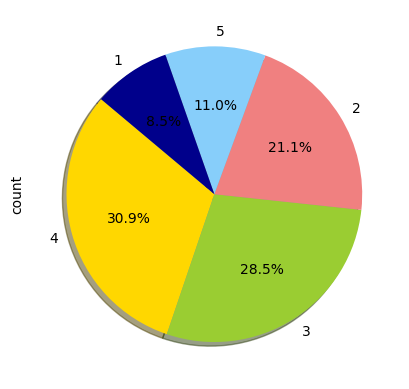

In [73]:
get_statistic_q(data['Q4'])

#### <b>Note: </b>
Many students agreed that the course was appropriate for the program and rated this course 4 points. This may mean that the teacher made small changes to the program during the training process, but in general the program did not undergo major changes.

<i>5. The class discussions, homework assignments, applications and studies were satisfactory (Q5).</i>

Median: 3.0
Average: 3.2260155574762317
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.0937059770034772


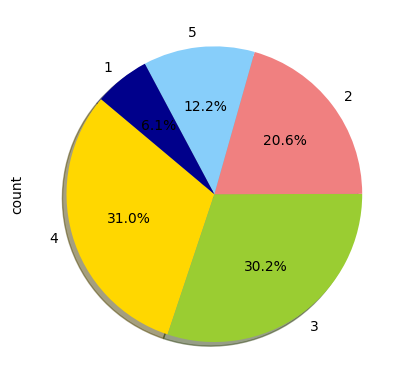

In [74]:
get_statistic_q(data['Q5'])

#### <b>Note: </b>
Most students rated this aspect 4 or 3 points. This may indicate that, in general, this part of the course satisfied the students. However, the number of those who rated the course 3 points more than those who rated it 5 points. It can be concluded that this aspect has certain disadvantages.

<i>6. The textbook and other courses resources were sufficient and up to date (Q6)</i>

Median: 3.0
Average: 3.211322385479689
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.1029307641135968


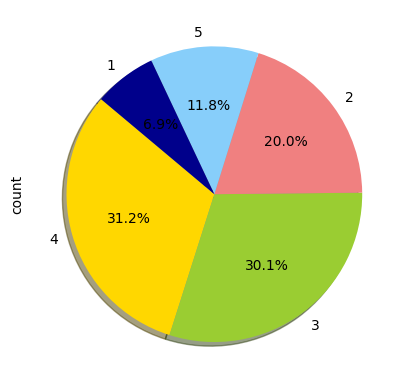

In [75]:
get_statistic_q(data['Q6'])

#### <b>Note: </b>
Most students rated this item at 4. We can say that, in general, the materials were relevant and were sufficient for mastering the course.

<i>7. The course allowed field work, applications, laboratory, discussion and other studies (Q7).</i>

Median: 3.0
Average: 3.135263612791703
Minimum value: 1
Maximum value: 5
Mode: 3
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.0960492841906897


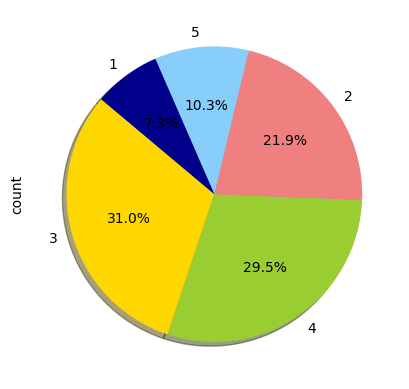

In [76]:
get_statistic_q(data['Q7'])

#### <b>Note: </b>
A fairly large number of students rated this item at 3 byla. This may indicate that the course involved little work in real conditions.

<i>8. The quizzes, assignments, projects and exams contributed to helping the learning (Q8)</i>

Median: 3.0
Average: 3.076923076923077
Minimum value: 1
Maximum value: 5
Mode: 3
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.1093104568666332


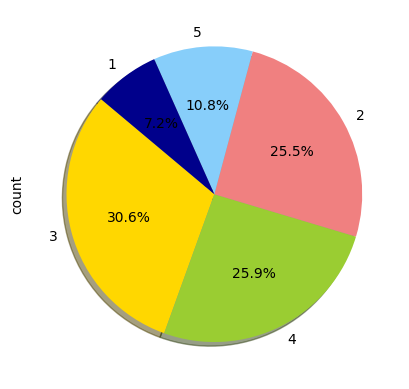

In [77]:
get_statistic_q(data['Q8'])

#### <b>Note: </b>
Many students answered this question 3. It can be concluded that the knowledge control system on the course did not fully satisfy the students.

<i>9. I greatly enjoyed the class and was eager to actively participate during the lectures (Q9).</i>

Median: 3.0
Average: 3.305963699222126
Minimum value: 1
Maximum value: 5
Mode: 3
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.0790978163516804


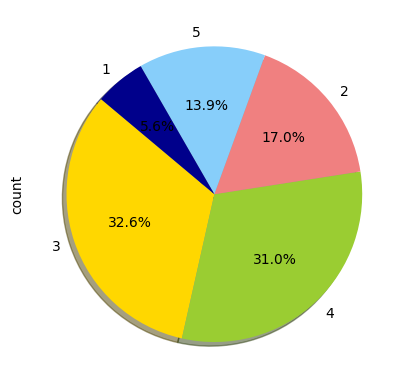

In [78]:
get_statistic_q(data['Q9'])

#### <b>Note: </b>
Students did not particularly want to take part in pairs. Perhaps the teacher introduced a couple of boring or the material itself was not interesting to students, so many rated this item at 3.

<i>10. My initial expectations about the course were met at the end of the period or year (Q10).</i>

Median: 3.0
Average: 3.204407951598963
Minimum value: 1
Maximum value: 5
Mode: 3
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.0676055852437356


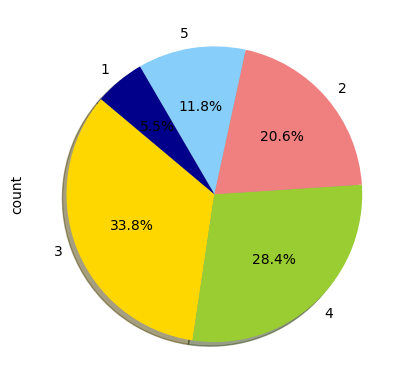

In [79]:
get_statistic_q(data['Q10'])

#### <b>Note: </b>
For most students, expectations were not met. Therefore, many rated this item at 3. This may be the result of the fact that the information that students were given at the beginning of the course was incomplete and ambiguous (Q1 was rated by many at 3 points).

<i>11. The course was relevant and beneficial to my professional development (Q11). </i>

Median: 3.0
Average: 3.369922212618842
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.1295937743781268


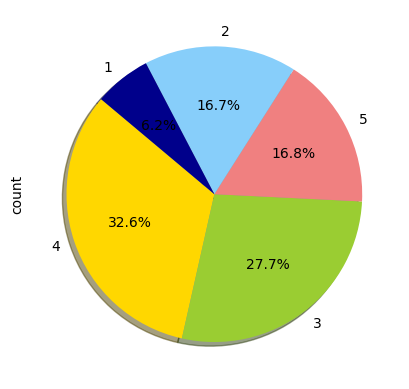

In [80]:
get_statistic_q(data['Q11'])

#### <b>Note: </b>
For many students, the course was useful and relevant. As a result, many rated this aspect at 4.

<i>12. The course helped me look at life and the world with a new perspective (Q12).</i>

Median: 3.0
Average: 3.065687121866897
Minimum value: 1
Maximum value: 5
Mode: 3
Quartile 1st: 2.0
Quartile 3rd: 4.0
Standard deviation: 1.1554520393557186


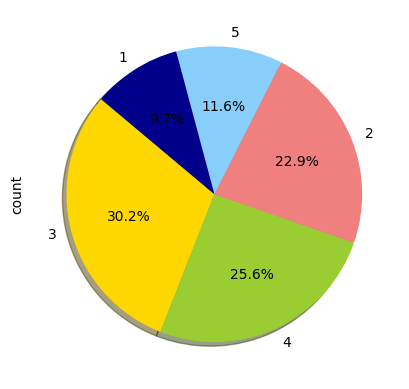

In [81]:
get_statistic_q(data['Q12'])

#### <b>Note: </b>
Most students rated this item at 3 points. Therefore, we can say that the course did not help many to look at the world from a different point of view.

<i>13. The Instructor's knowledge was relevant and up to date (Q13).</i>

Median: 4.0
Average: 3.563094209161625
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9711106414039498


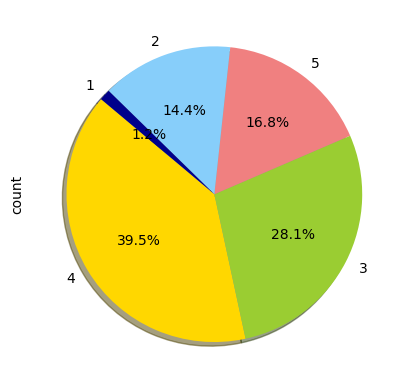

In [82]:
get_statistic_q(data['Q13'])

#### <b>Note: </b>
Almost half of the students considered the knowledge of the teacher relevant and rated this item at 4 points. This may indicate that the teacher gave new and useful material to the listeners.

<i>14. The Instructor came prepared for classes (Q14).</i>

Median: 4.0
Average: 3.657303370786517
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9287737367859893


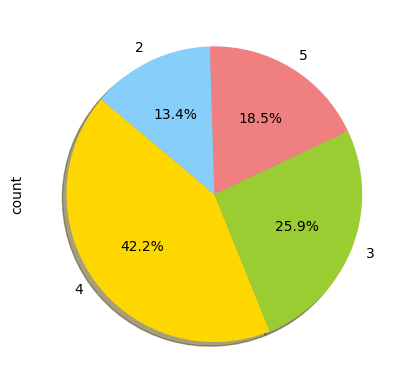

In [83]:
get_statistic_q(data['Q14'])

#### <b>Note: </b>
The preparedness of the teacher was rated by the majority of students at 4 points, which may indicate that the teacher always came ready for classes and occasionally lingered.

<i> 15. The Instructor taught in accordance with the announced lesson plan (Q15).</i>

Median: 4.0
Average: 3.6486603284356094
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9222617471349118


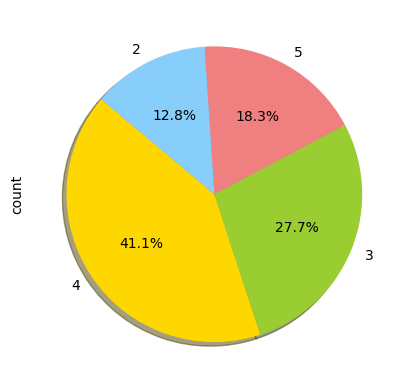

In [84]:
get_statistic_q(data['Q15'])

#### <b>Note: </b>
Slightly more than half of all listeners rate this item at 4 points. This suggests that the teacher followed the outlined plan of the couple and practically did not deviate from the topic.

<i> 16. The Instructor was committed to the course and was understandable (Q16).</i>

Median: 3.0
Average: 3.4338807260155573
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.0296897712954183


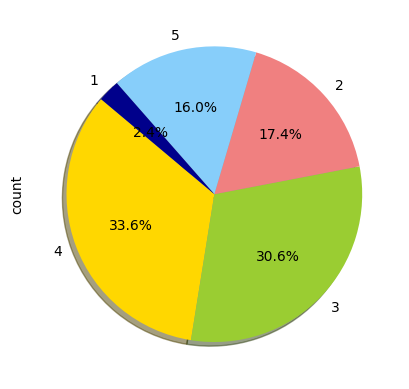

In [85]:
get_statistic_q(data['Q16'])

#### <b>Note: </b>
Most students rated this item 4 or 3 points. This means that, in general, the instructor explained the course material in an understandable way and followed the previously defined plan.

<i> 17. The Instructor arrived on time for classes (Q17).</i>

Median: 4.0
Average: 3.8193604148660327
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9267352132020631


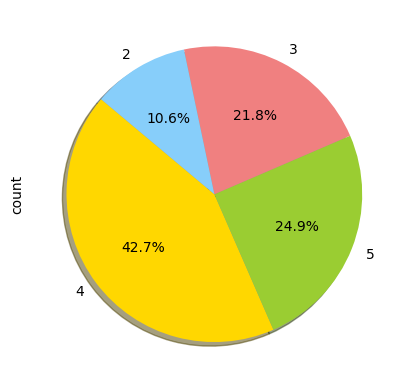

In [86]:
get_statistic_q(data['Q17'])

#### <b>Note: </b>
Almost half of the students mark the teacher's punctuality as 4. However, about 24.9% mark the teacher's punctuality as excellent. This may indicate that the couple always started on time and in rare cases had to wait for the teacher.

<i>18. The Instructor has a smooth and easy to follow delivery/speech (Q18).</i>

Median: 4.0
Average: 3.5293863439930857
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.0119266570643015


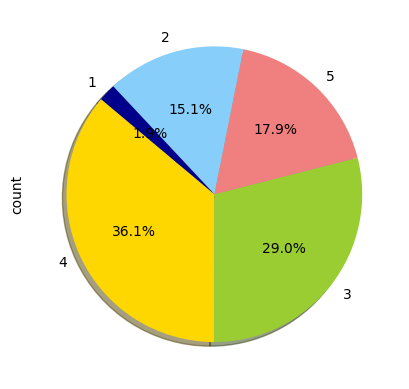

In [87]:
get_statistic_q(data['Q18'])

#### <b>Note: </b>
Most students mark the speech of the teacher by 4 points. It was clear and easy for listeners to listen to the material he was reading.

<i>19. The Instructor made effective use of class hours (Q19).</i>

Median: 4.0
Average: 3.6244598098530685
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9429593413269348


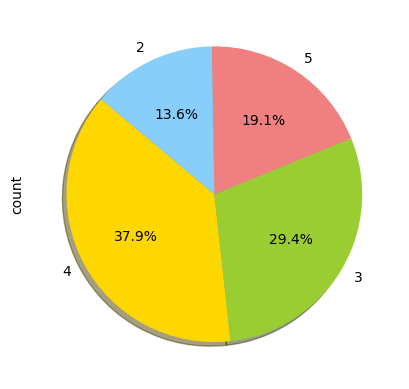

In [88]:
get_statistic_q(data['Q19'])

#### <b>Note: </b>
Most of the students rate the effectiveness of the use of class hours by the teacher at 4 points, which indicates that the teacher harmoniously organized his pairs.

<i> 20. The Instructor explained the course and was eager to be helpful to students (Q20).</i>

Median: 4.0
Average: 3.6707000864304233
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9558054045699335


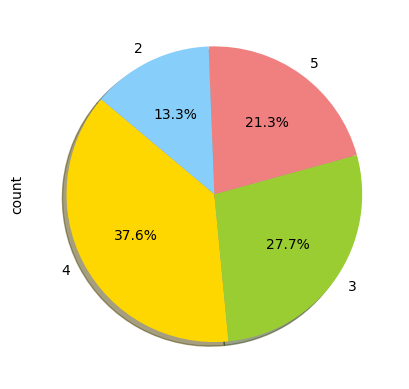

In [89]:
get_statistic_q(data['Q20'])

#### <b>Note: </b>
The desire of the teacher to help understand the material and explain it clearly was rated by many students at 4 points, which indicates that the teacher helped the students to master the material and was ready to help.

<i> 21.  The Instructor demonstrated a positive approach to students (Q21).</i>

Median: 4.0
Average: 3.7005185825410543
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9518133824229091


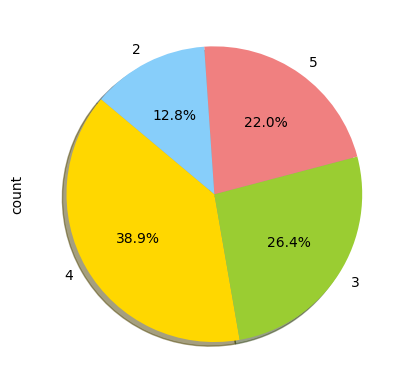

In [90]:
get_statistic_q(data['Q21'])

#### <b>Note: </b>
The ratio of the teacher to the students was rated by the majority at 4 points, in addition, 26.4% rated this indicator at all as 3 points. This may indicate that the teacher was not sufficiently disposed towards the students.

<i> 22. The Instructor was open and respectful of the views of students about the course (Q22).</i>

Median: 4.0
Average: 3.7182368193604147
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9492733713299918


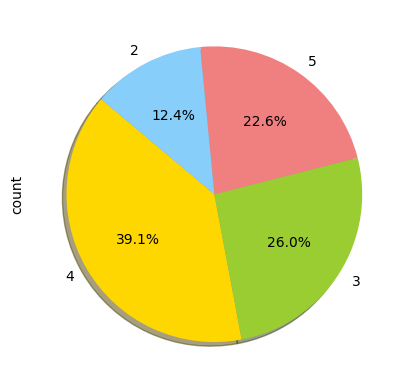

In [91]:
get_statistic_q(data['Q22'])

#### <b>Note: </b>
Slightly less than half of the students note the interaction with the teacher at 4 points, while 26.0% rated this item at 3, which indicates that the teacher was not always open and respectful towards the audience.

<i>23. The Instructor encouraged participation in the course (Q23).</i>

Median: 4.0
Average: 3.4779602420051856
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.0022404586856823


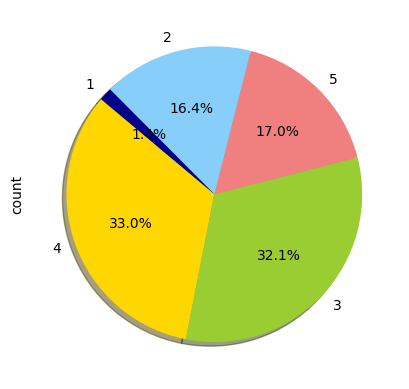

In [92]:
get_statistic_q(data['Q23'])

#### <b>Note: </b>
Most students rated this item 4 points. It can be concluded that the teacher encouraged and encouraged the students to express themselves during classes.

<i> 24. The Instructor gave relevant homework assignments/projects, and helped/guided students (Q24).</i>

Median: 3.0
Average: 3.4006050129645637
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.0261684477159194


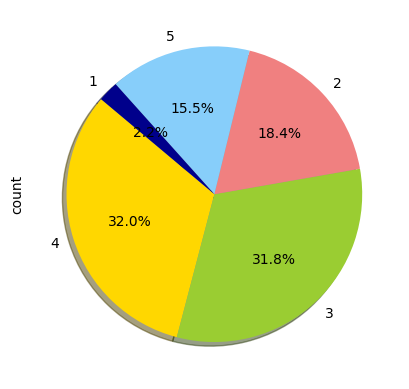

In [93]:
get_statistic_q(data['Q24'])

#### <b>Note: </b>
Students note that homework/practical projects have always been consistent with the course materials. The teacher managed to organize the students well.

<i> 25. The Instructor responded to questions about the course inside and outside of the course (Q25).</i>

Median: 4.0
Average: 3.691875540190147
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9343581690843753


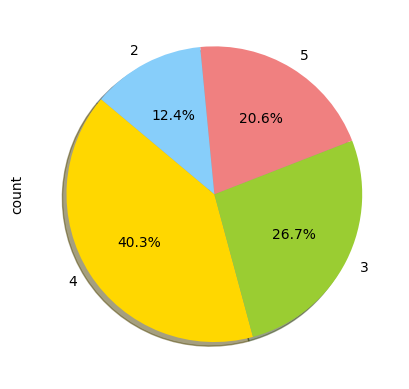

In [94]:
get_statistic_q(data['Q25'])

#### <b>Note: </b>
The interaction of the teacher with the students on and off the course is rated by the students at 4 points, which indicates that the teacher willingly got in touch with the students.

<i> 26. The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives (Q26).</i>

Median: 4.0
Average: 3.5129645635263613
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9993753048983802


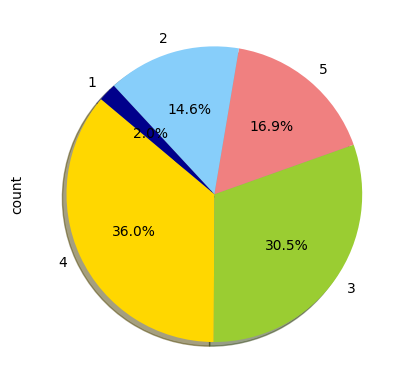

In [95]:
get_statistic_q(data['Q26'])

#### <b>Note: </b>
The system of assessing students' knowledge by the teacher is rated by students by 4 points, which is a good indicator that the teacher has determined a fair assessment system.

<i> 27. The Instructor provided solutions to exams and discussed them with students (Q27).</i>

Median: 3.0
Average: 3.378133102852204
Minimum value: 1
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 1.0784477353789264


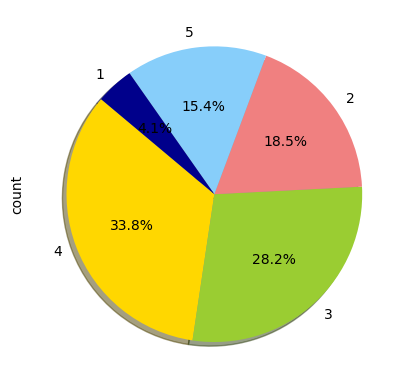

In [96]:
get_statistic_q(data['Q27'])

#### <b>Note: </b>
Preparation for exams with a teacher was rated by many students at 4 points, which indicates that the teacher as a whole explained everything clearly and provided all the necessary materials and solutions for students to pass the exam. However, given that 28.2% of students rated this item at 3 points, we can say that this aspect has certain shortcomings on the part of the teacher.

<i> 28.  The Instructor treated all students in a right and objective manner (Q28).</i>

Median: 4.0
Average: 3.7143474503025065
Minimum value: 2
Maximum value: 5
Mode: 4
Quartile 1st: 3.0
Quartile 3rd: 4.0
Standard deviation: 0.9528857267458876


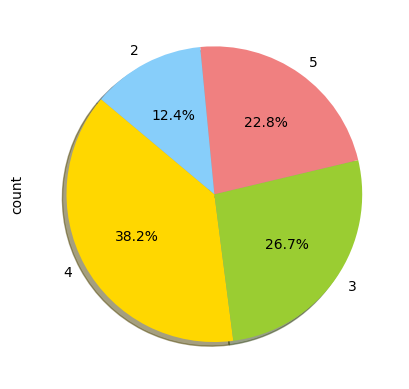

In [97]:
get_statistic_q(data['Q28'])

#### <b>Note: </b>
More than half of the students rated the objectivity of the teacher at 4 points, in turn, 26.7% of the students rated this question at 3 points. This suggests that the teacher was open-minded towards students.

## Feature correlation matrix

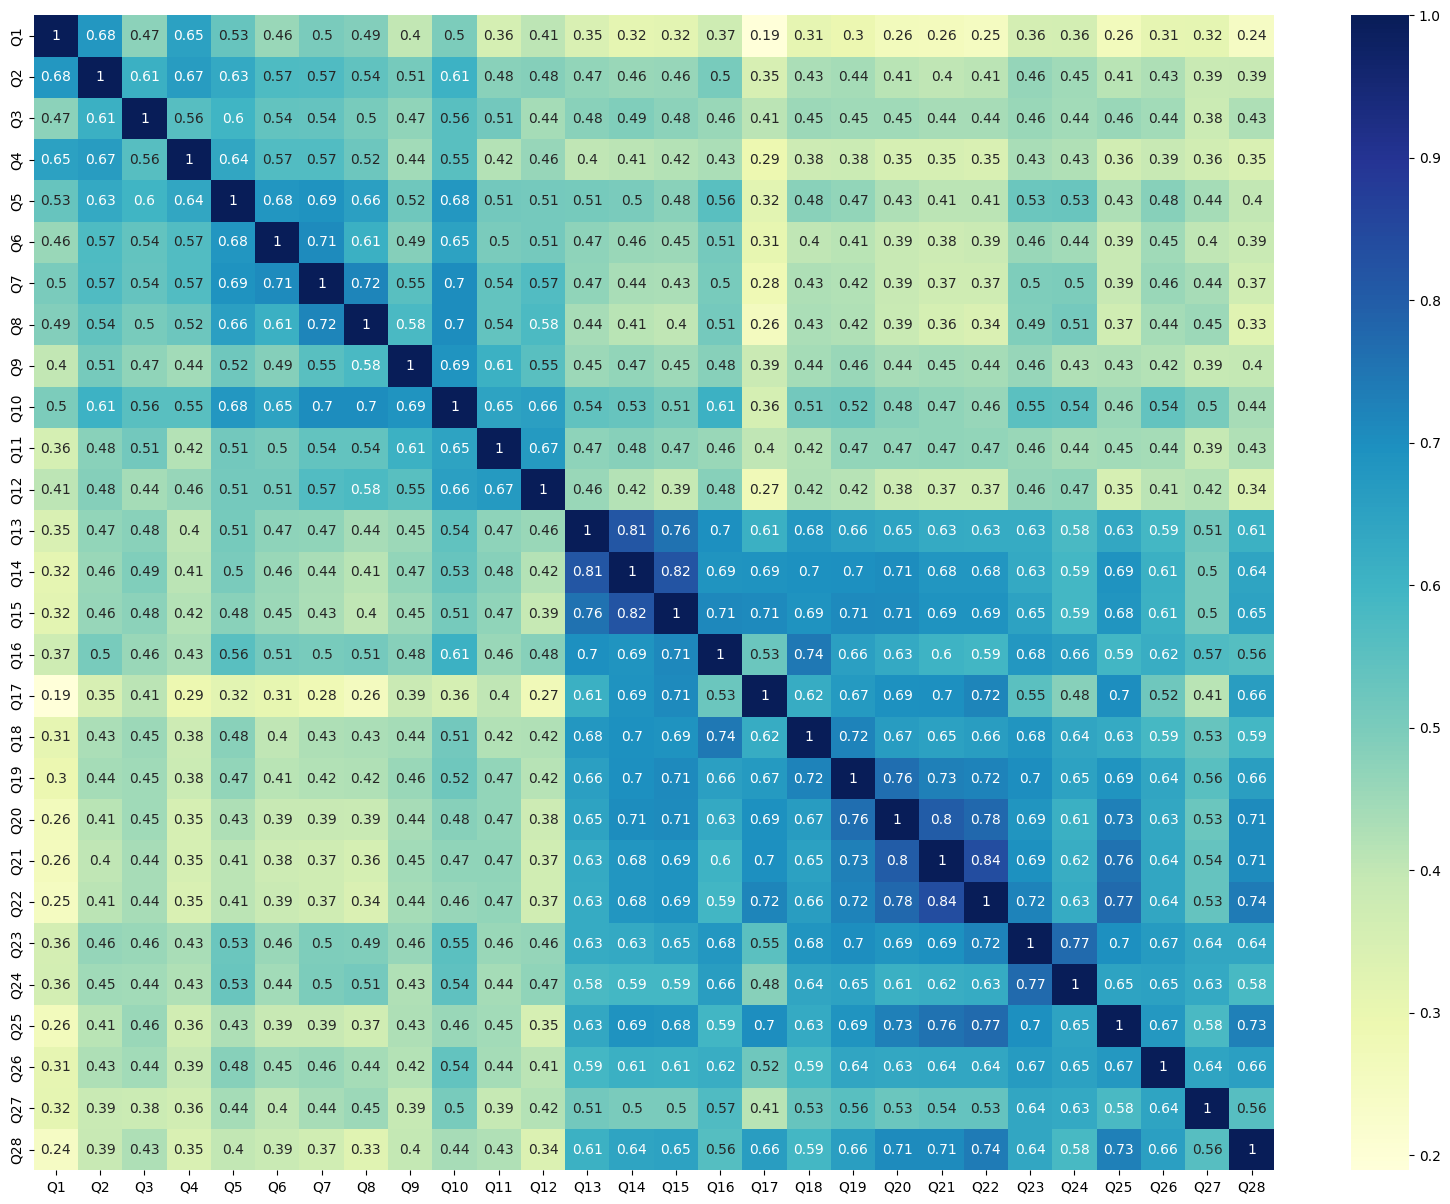

In [98]:
data_qu = data[columns_q]
corr_matrix=data_qu.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix,annot =True, cmap="YlGnBu")
plt.show()

#### <b>Note: </b>


There is a dependency in the data, specifically:
    <ul><li>Q1 is highly dependent on Q4, this can be justified by the fact that these questions are dependent in meaning, that is, one follows from the other. So question Q1 is aimed at finding out what information students received at the beginning of the course, while the Q4 focuses on the ratio of what information the students were given in the beginning with what the students received in the end.</li></ul>
    <ul><li>Q2 has a number of dependencies with some features, but a dependency with Q10 stands out. Question Q2 aims to determine how well and clearly the goal of the course is stated, question Q10 asks you to rate how expectations were met. Thus, the clearer the goal and task is, the higher the likelihood of expectations being justified.</li></ul>
    <ul><li>Q3 it is rather difficult to single out any specific dependency, since this feature is on average 0.5 dependent on another.</li></ul>
    <ul><li>Q5 has strong dependencies with Q6,Q7,Q8,Q10. All questions are aimed at determining the quality of education, that is, the content of the course, the relevance of materials. It's easy to see the connection, if a student scores high enough on questions Q5,Q6,Q7,Q8, then Q10 is likely to score high enough.</li></ul>
    <ul><li>Q7 is heavily dependent on Q8. Both questions try to reveal the quality and quantity of practical tasks in the course.</li></ul>
    <ul><li>Q9 has a slight (compared to other features) dependence on other features. This question is structured differently and does not determine the course content as a whole, but specifically the quality of one pair.</li></ul>
    <ul><li>Starting from Q13, there is a strong dependence on subsequent tasks. This can be explained by the fact that the questions are aimed specifically at assessing the teacher and the quality of his work.</li></ul>

## Dimensionality reduction

#### PCA

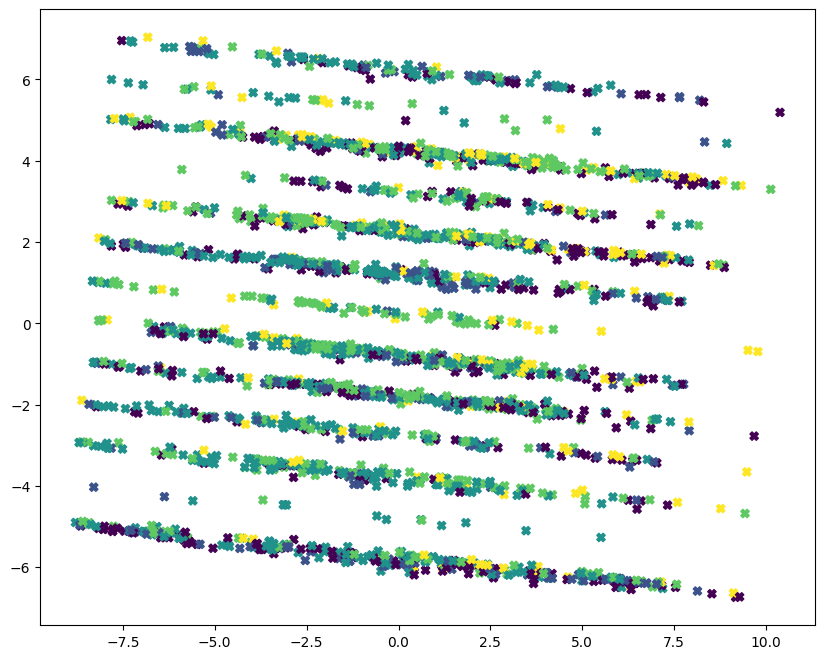

[46.09  9.38  4.27  3.37  3.25  3.09  2.98  2.61  2.1   1.83  1.81  1.55
  1.42  1.35  1.09  1.08  1.06  1.    0.94  0.9 ]


In [99]:
data_class = data['difficulty']
pca = PCA()
U = pca.fit_transform(data)
plt.figure(figsize=(10, 8))
plt.scatter(U[:, 0], U[:, 1], c=data_class, marker='X')
plt.show()

# print(pca.components_)

data_s = scale(data)
# print(data_s)
pca = PCA(n_components=20)
U = pca.fit_transform(data_s)
print(np.round(pca.explained_variance_ratio_*100, 2))

#### MinMaxScaler

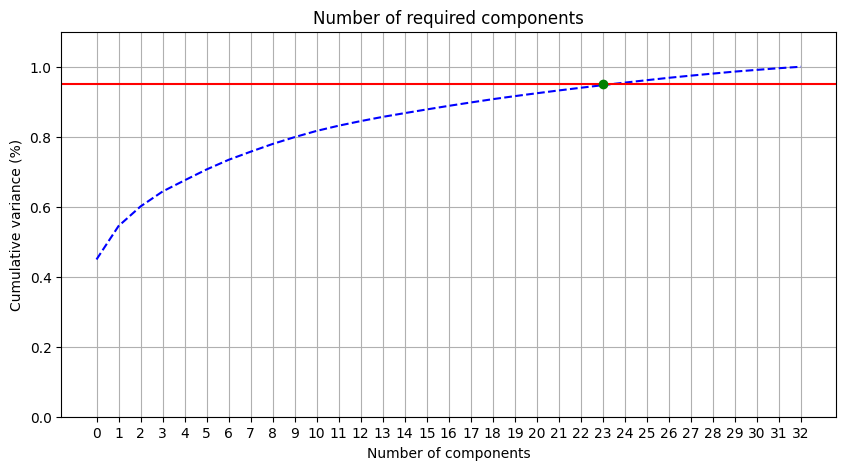

In [100]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)
pca = PCA().fit(data_rescaled)


fig, ax = plt.subplots(figsize=(10, 5))

xi = np.arange(0, 33, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, linestyle='--', color='b', )

plt.xlabel('Number of components')
plt.xticks(np.arange(0, 33, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('Number of required components')

plt.axhline(y=0.95, color='r')

plt.plot(23,0.95, 'go')
ax.grid()
plt.show()


#### <b>Note: </b>

Based on the above calculations, we can say that the optimal number of components will be 23. And they have the following characteristics:

[46.09  9.38  4.27  3.37  3.25  3.09  2.98  2.61  2.1   1.83  1.81  1.55 1.43  1.35  1.09  1.08  1.06  1.    0.94  0.9 ]

#### TSNE/UMAP

TSNE

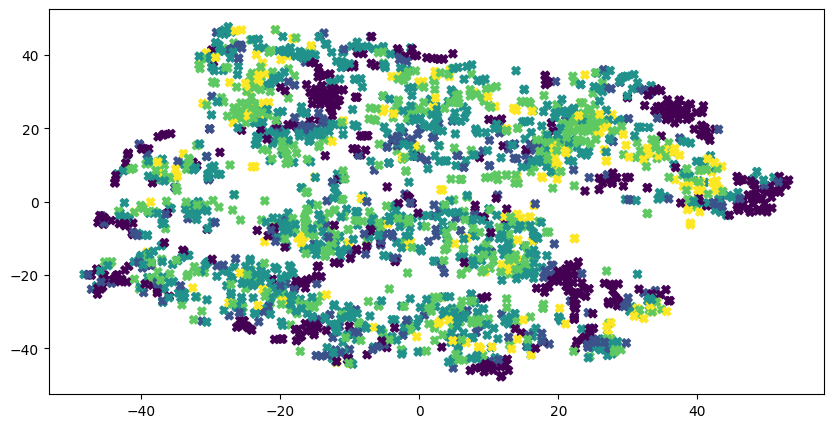

In [101]:
tsne = TSNE(perplexity=23)
Z = tsne.fit_transform(data)
plt.figure(figsize=(10, 5))
plt.scatter(Z[:, 0], Z[:, 1], c = data_class, marker='X')
plt.show()

UMAP

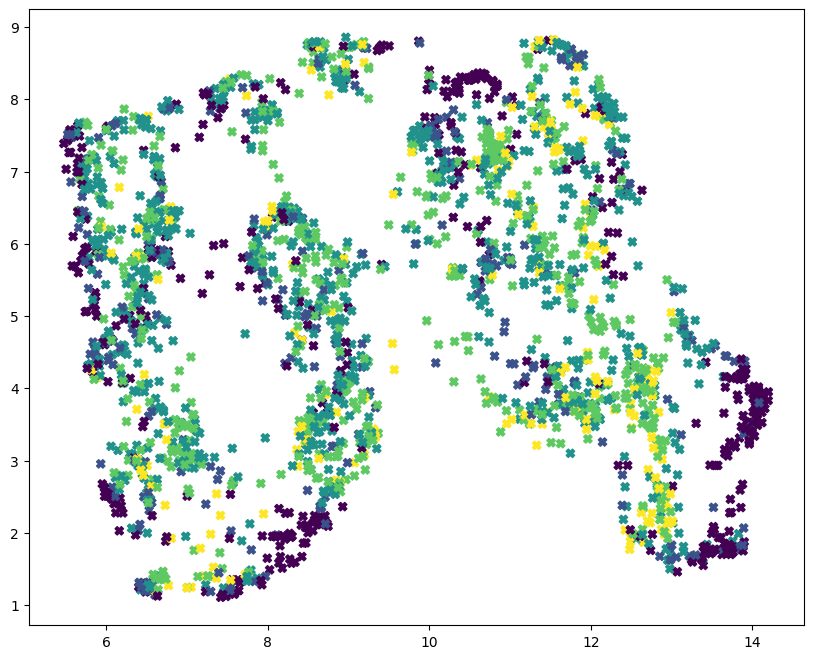

In [102]:
ump = umap.UMAP(n_neighbors=23)
Z = ump.fit_transform(data)
Z.shape
plt.figure(figsize=(10, 8))
plt.scatter(Z[:, 0], Z[:, 1], c=data_class, marker='X')
plt.show()

#### <b>Note: </b>

It is difficult to single out any specific groups on the graphs. Since the values are quite close to each other.